# Plotting Corona virus

Er zijn verschillende websites die visualisaties maken van het corona virus. Een bekende is 

https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

Maar hoe wordt die gemaakt? In dit notebook kijken we naar verschillende visualisaties van het virus. Data kun je vinden op 

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data



## Opdracht plotjes

maak een barplot van 4 landen

In [2]:
#allereerst maken we de data zo klein dat ze maar vier landen bevatten
data = data[0:4]
data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515


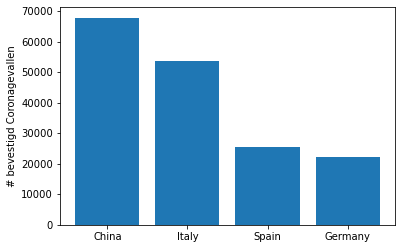

In [3]:
# bepaal voor de x de landen, voor de hoogte nemen we de confirmed kolom
plt.figure()
plt.ylabel('# bevestigd Coronagevallen')
plt.bar(x = data['Country/Region'], height = data['Confirmed'])
plt.show()

## Time series
Laten we eens naar de time series data kijken

In [4]:
#Allereerst laden we de data

In [5]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_t = pd.read_csv(url)
data_t.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895


In [6]:
def reformat(data_t):
    data_t.index = data_t['Country/Region']
    data_t = data_t.drop('Province/State', axis = 1)
    data_t = data_t.drop('Country/Region', axis = 1)
    data_t = data_t.drop('Lat', axis = 1)
    data_t = data_t.drop('Long', axis = 1)
    return data_t

data_t = reformat(data_t)
data_t.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309
Albania,0,0,0,0,0,0,0,0,0,0,...,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618
Algeria,0,0,0,0,0,0,0,0,0,0,...,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046
Andorra,0,0,0,0,0,0,0,0,0,0,...,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271
Angola,0,0,0,0,0,0,0,0,0,0,...,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895


In [7]:
#check zit Nederland erin?
nl = data_t.loc[r"Netherlands"].values.tolist()
print(nl)


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 4, 4, 5, 5, 9, 9, 12, 17, 28, 33, 46, 50, 50, 55, 55, 60, 62, 64, 64, 71, 74, 77, 82, 86, 92, 92, 92, 92, 93, 95, 96, 96, 97, 97, 97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 103, 103, 103, 104, 104, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 106, 106, 108, 111, 111, 113, 115, 117, 117, 117, 118, 119, 119, 119, 119, 119, 120, 121, 121, 122, 124, 132, 171, 263, 396, 509, 563, 630, 717, 798, 894, 973, 1048, 1102, 1121, 1205, 1296, 1387, 1464, 1534, 1568, 1628, 1670, 1760, 1848, 1906, 1975, 1997, 2006, 2104, 2211, 2292, 2

In [8]:
#Nederland zit er twee keer in, Nederland en curacao
#check zit Nederland erin? Ik wil alleen Nederland
nl = data_t.loc[r"Netherlands"].values.tolist()[0]
print(nl)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 4, 4, 5, 5, 9, 9, 12, 17, 28, 33, 46, 50, 50, 55, 55, 60, 62, 64, 64, 71, 74, 77, 82, 86, 92, 92, 92, 92, 93, 95, 96, 96, 97, 97, 97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 103, 103, 103, 104, 104, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 106, 106, 108, 111, 111, 113, 115, 117, 117, 117, 118, 119, 119, 119, 119, 119, 120, 121, 121, 122, 124, 132, 171, 263, 396, 509, 563, 630, 717, 798, 894, 973, 1048, 1102, 1121, 1205, 1296, 1387, 1464, 1534, 1568, 1628, 1670, 1760, 1848, 1906, 1975, 1997, 2006, 2104, 2211, 2292, 23

In [9]:
nlr = data_t.loc[r"Netherlands"]
nlr

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Netherlands,0,0,0,0,0,0,0,0,0,0,...,15416,15432,15448,15472,15500,15514,15533,15536,15543,15560
Netherlands,0,0,0,0,0,0,0,0,0,0,...,2019,2045,2068,2083,2096,2116,2126,2141,2157,2168
Netherlands,0,0,0,0,0,0,0,0,0,0,...,16373,16383,16428,16465,16500,16556,16592,16609,16618,16650
Netherlands,0,0,0,0,0,0,0,0,0,0,...,4213,4235,4263,4263,4283,4291,4307,4321,4342,4342
Netherlands,0,0,0,0,0,0,0,0,0,0,...,1996498,1997885,1999592,2001347,2003050,2004763,2006421,2008024,2009648,2011530


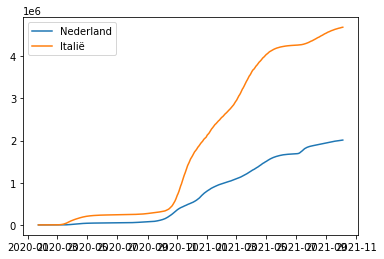

In [10]:
# dan laden we x en y
nl = data_t.loc[r"Netherlands"].values.tolist()[4]
it = data_t.loc[r"Italy"].values.tolist()
x = pd.date_range('1/22/2020', periods = len(nl), freq ='d') 
plt.plot(x, nl, label="Nederland")
plt.plot(x, it, label="Italië")
plt.legend()
plt.show()

# Opdracht
1. Maak de labels van de time series mooier. Plot ook Sweden of andere landen. Maak een zwarte achtergrond met dikke lijnen


In [11]:
len(nl)

623

# Opdracht uitwerking

Om de opdracht goed uit te kunnen voeren ga ik eerst op internet en in de documentatie zoeken hoe ik dit kan doen. Ik vind het volgende

voor dikke lijnen kan ik gewoon een optie meegegeven in de plot functie. Ik had gegoogled op 'change line thickness in matplotlib plot' en vond toen deze pagina

    https://pythonprogramming.net/graphing-matplotlib-python-part-3-colors-line-thickness/

ik kies ervoor om `plt.plot(x, nl, label="Nederland", linewidth=5)` te gebruiken

Voor de date time thicks moet ik wat langer zoeken. Ik google op keywords zoals display datetime format x label matplotlib en vind een sites zoals

    https://stackoverflow.com/questions/5498510/creating-graph-with-date-and-time-in-axis-labels-with-matplotlib
    https://matplotlib.org/3.2.0/gallery/text_labels_and_annotations/date.html
    
Ik probeer wat uit en ik kom uiteindelijk op de volgende code
    
    import matplotlib.dates as mdates
    days = mdates.WeekdayLocator()
    daysFmt = mdates.DateFormatter('%m-%d')

    ax = plt.gca() 
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)

om de achtergrond zwart te maken vind ik verschillende oplossingen. zie 
    
    https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color

Ik kies ervoor om de `ax.patch.set_facecolor('black')` te gebruiken omdat ik toch al een ax gebruikt heb

Mijn oplossing ziet er als volgt uit

In [12]:
import re
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import NullFormatter
from matplotlib.dates import DateFormatter
#dan laden we x en y

#x-waarden moeten datetime waarden zijn van 1/22/2020 tot en met 3/17/2030
x = pd.date_range('1/22/2020', periods = len(nl), freq ='d') 

#y-waarden zijn de rijen per land aan eenvolgende data
nl = data_t.loc[r"Netherlands"].values.tolist()[4]
it = data_t.loc[r"Italy"].values.tolist()
sw = data_t.loc[r"Sweden"].values.tolist()
ir = data_t.loc[r"Iran"].values.tolist()
be = data_t.loc[r"Belgium"].values.tolist()
sp = data_t.loc[r"Spain"].values.tolist()
ch = data_t.loc[r"China"].values.tolist()[0]

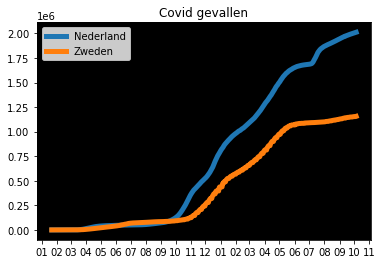

In [13]:
#plot de landen met dikke lijnen
plt.plot(x, nl, label="Nederland", linewidth=5)
#plt.plot(x, it, label="Italië", linewidth=5)
#plt.plot(x, ir, label="Iran", linewidth=5)
plt.plot(x, sw, label="Zweden", linewidth=5)
#plt.plot(x, be, label="België", linewidth=5)
#plt.plot(x, sp, label="Spain", linewidth=5)
plt.legend()
plt.title('Covid gevallen')

# dit heb ik opgezocht op internet. 
# dit is een trucje om de data in een mooi formaat van de x-as labels te krijgen
import matplotlib.dates as mdates
months = mdates.MonthLocator()
mt = mdates.DateFormatter('%m')
ax = plt.gca() 
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(mt)
#einde trucje voor mooie x-as

#zet nu achtergrond op zwart
ax.patch.set_facecolor('black')

plt.show()


# Challenge
Maak een plot van confirmed, death en recovered. De data staat op https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

Deze opdracht kan op verschillende manieren. Dat kan een barplot zijn van alle landen, een timeseries van enkele landen etc. Het is maar net hoe je de onderzoeksvraag wilt beantwoorden. Er is geen 1 antwoord maar meerdere antwoorden op deze vraag. Ik besluit om een barplot te maken met totalen per categorie en % Daarvoor heb ik een sommatie nodig van alle landen. 

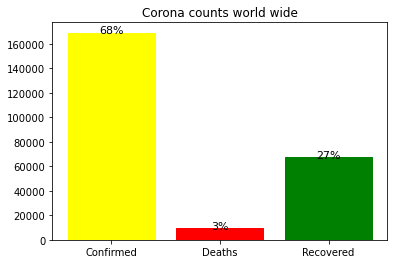

In [14]:
#sommatie van alle rijen uit de dataframe
confirmed = data['Confirmed'].sum()
deaths = data['Deaths'].sum()
recovered = data['Recovered'].sum()
#laad x en y
x =['Confirmed', 'Deaths', 'Recovered']
y =[confirmed, deaths, recovered]
#maak plotjes met kleuren en titel
bars = plt.bar(x=x, height=y)
bars[0].set_color('yellow')
bars[1].set_color('red')
bars[2].set_color('green')
plt.title('Corona counts world wide')
total = confirmed + deaths + recovered
# plot percentages 
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 500, str(int(height/total*100)) + '%', 
                 ha='center', color='black', fontsize=11)
plt.show()